# Atelier de K-Means

# Prétraitement des données :

Importer les bibliothèques nécessaires (NumPy, Matplotlib, Pandas).
Charger le jeu de données et extraire les variables indépendantes pertinente

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import fcluster


# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:, [3, 4]].values


# Trouver le nombre optimal de clusters (Méthode du coude) :

Utiliser la méthode du coude pour trouver le nombre optimal de clusters.
Tracer la somme des carrés intra-cluster (WCSS) en fonction du nombre de clusters.

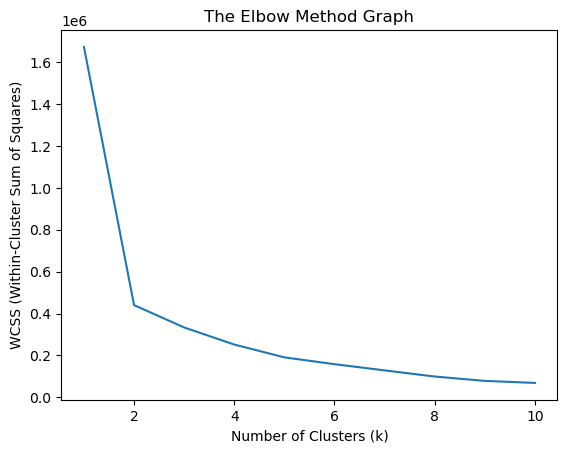

In [27]:
import warnings
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

wcss_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss_list)

plt.title('The Elbow Method Graph')

plt.xlabel('Number of Clusters (k)')

plt.ylabel('WCSS (Within-Cluster Sum of Squares)')

plt.show()


# Entraînement de l'algorithme K-Means :

Entraîner l'algorithme K-Means sur l'ensemble de données d'entraînement avec le nombre de clusters choisi (5 dans ce cas).

In [28]:
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(x)

# Visualisation des clusters :

Diagramme de dispersion pour visualiser les clusters basés sur les étiquettes prédites.
Différentes couleurs représentent différents clusters, et les centroïdes sont marqués en jaune.

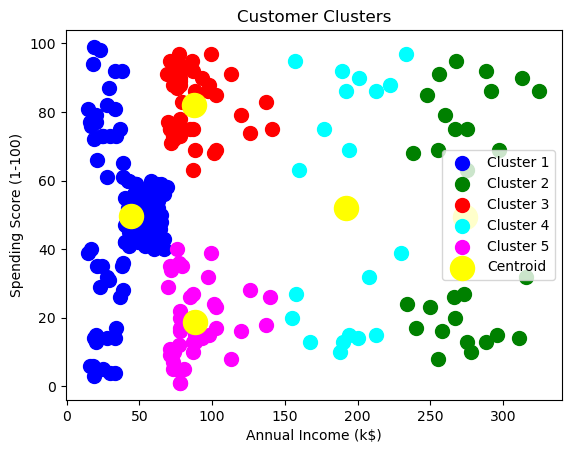

In [30]:

plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s=100, c='blue', label='Cluster 1') 

plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s=100, c='green', label='Cluster 2') 

plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s=100, c='red', label='Cluster 3') 

plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s=100, c='cyan', label='Cluster 4') 

plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s=100, c='magenta', label='Cluster 5')  

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')

plt.title('Customer Clusters')

plt.xlabel('Annual Income (k$)')

plt.ylabel('Spending Score (1-100)')

plt.legend()

plt.show()


# ALGORITHME CAH

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv('wine-clustering.csv')
df=df.head(30)
len(df)
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


-- La dataset que vous avez fournie semble être une collection de données sur des caractéristiques chimiques spécifiques de vins.

-- Chaque ligne représente un échantillon de vin

-- chaque colonne représente une caractéristique chimique différente mesurée pour cet échantillon.


        **Alcohol : Le pourcentage d'alcool dans le vin, mesuré en volume.

        **Malic_Acid : La quantité d'acide malique dans le vin, mesurée en g/L (grammes par litre).

        **Ash : La quantité de cendres dans le vin, mesurée en g/L.

        **Ash_Alcanity : L'alcalinité des cendres dans le vin.

        **Magnesium : La quantité de magnésium dans le vin, mesurée en mg/L (milligrammes par litre).

        **Total_Phenols : Le total des phénols dans le vin, mesuré en mg/L.

        **Flavanoids : La quantité de flavonoïdes dans le vin, mesurée en mg/L.

        **Nonflavanoid_Phenols : La quantité de phénols non flavonoïdes dans le vin, mesurée en mg/L.

        **Proanthocyanins : La quantité de proanthocyanidines dans le vin, mesurée en mg/L.

        **Color_Intensity : L'intensité de la couleur du vin.

        **Hue : La teinte du vin.

        **OD280 : La densité optique à 280 nm, une mesure de l'absorbance de la lumière par le vin.

        **Proline : La quantité de proline (un acide aminé) dans le vin, mesurée en mg/L.
        
        

In [4]:
# import pandas as pd

# Afficher les dimensions du DataFrame
num_rows, num_columns = df.shape

# Soustraire 1 pour exclure la première colonne (identifiant ou classe)
num_features = num_columns 

# Afficher le nombre de caractéristiques
print(f"Il y a {num_features} caractéristiques dans le DataFrame.")


Il y a 13 caractéristiques dans le DataFrame.


 -- Afficher les premières lignes du DataFrame pour vérifier les données

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

print(df.head())


   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

-- Afficher les données sous Deux axes (Caractéristique 1 et Caractéristique 2)

C:\Users\T480\AppData\Local\Temp\ipykernel_23416\1292495452.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(features_scaled[:, 0], features_scaled[:, 1], s=50, cmap='viridis')


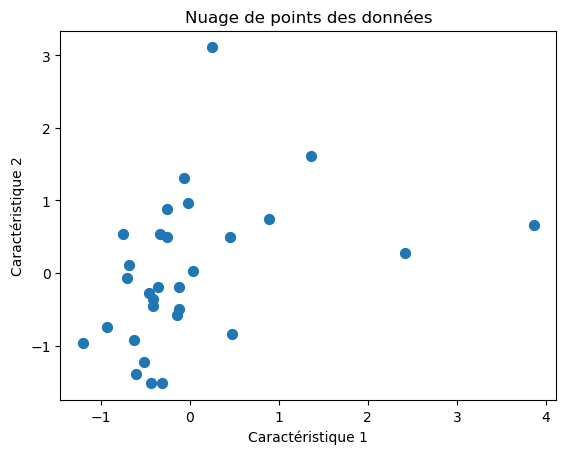

In [7]:
# Sélectionner les caractéristiques pour l'analyse
features = df.iloc[:, 1:]  # Exclure la première colonne qui pourrait être un identifiant ou une classe

# Standardiser les données pour s'assurer que toutes les variables sont sur la même échelle
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Nuage de points
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], s=50, cmap='viridis')
plt.title('Nuage de points des données')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.show()

# La méthode ELBOW

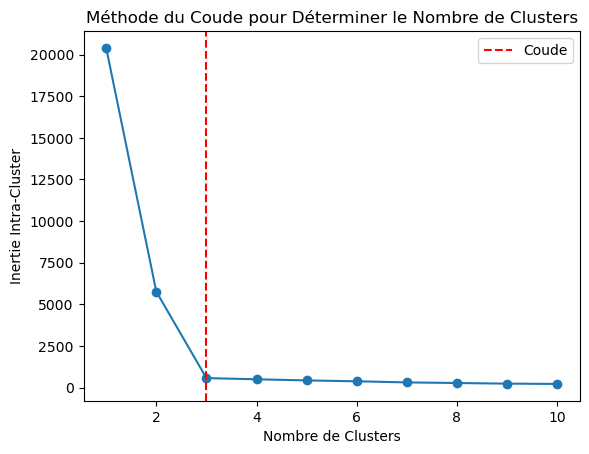

In [8]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Ignorer les avertissements liés à KMeans
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Générer des données synthétiques avec 3 clusters
data, labels = make_blobs(n_samples=300, centers=3, random_state=42)

# Appliquer KMeans avec un nombre de clusters variant de 1 à 10
inertia = []
possible_clusters = range(1, 11)

for k in possible_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude avec une ligne pointillée au niveau du coude
plt.plot(possible_clusters, inertia, marker='o')
plt.title('Méthode du Coude pour Déterminer le Nombre de Clusters')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie Intra-Cluster')
plt.axvline(x=3, color='r', linestyle='--', label='Coude')
plt.legend()
plt.show()


Le nombre de clusters optimal est presque 3

-- L'application de la CAH avec l'écart de Ward vous permet d'utiliser n'importe quelle mesure de distance, telle que l'écart moyen, la complète, etc., en fonction du type de données

-- Vous n'êtes pas obligé de spécifier le nombre de clusters au début.

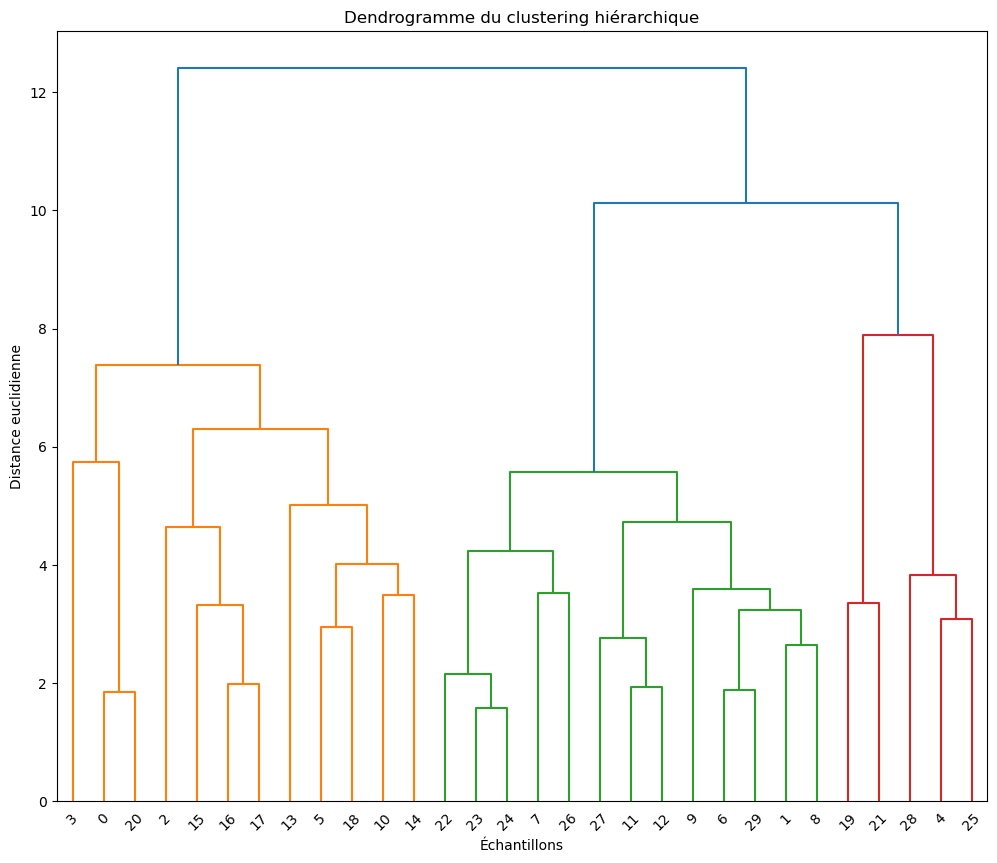

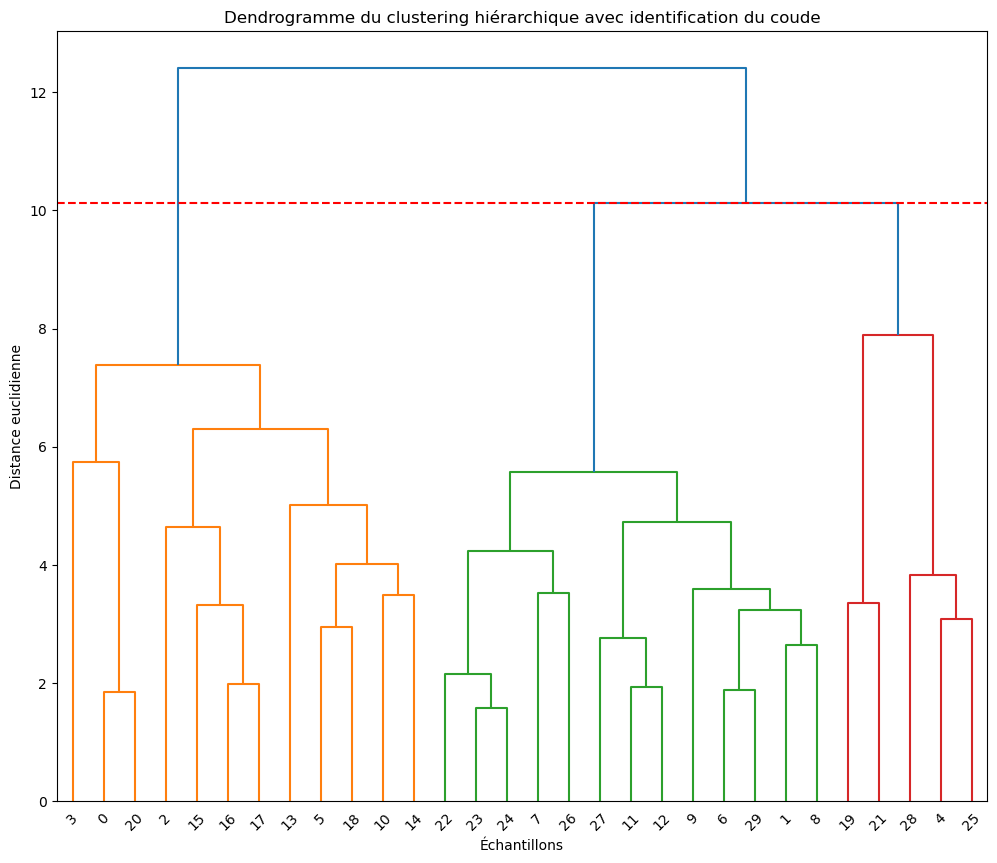

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,2
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,2
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,2
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,2


In [12]:
linkage_matrix = linkage(features_scaled, method='ward')  # Utiliser la liaison de Ward

# Tracer le dendrogramme
plt.figure(figsize=(12, 10))
dendrogram(linkage_matrix)
plt.title('Dendrogramme du clustering hiérarchique')
plt.xlabel('Échantillons')
plt.ylabel('Distance euclidienne')
plt.show()

# Utiliser la méthode du coude pour déterminer le nombre de clusters
distances = linkage_matrix[:, 2]
deltas = np.diff(distances, 2)
# Trouver l'indice du coude
elbow_index = np.argmax(deltas) + 2  # Ajouter 2 en raison de np.diff et du zéro initial

# Tracer une ligne pointillée pour indiquer le coude
plt.figure(figsize=(12, 10))
dendrogram(linkage_matrix)
plt.title('Dendrogramme du clustering hiérarchique avec identification du coude')
plt.xlabel('Échantillons')
plt.ylabel('Distance euclidienne')
plt.axhline(y=distances[elbow_index], color='r', linestyle='--', label='Coude')
plt.show()

# Utiliser la méthode du coude pour déterminer le nombre de clusters
n_clusters = elbow_index + 1  # +1 car les indices commencent à 1 dans fcluster

# Appliquer le clustering avec le nombre de clusters déterminé par la méthode du coude
cluster_labels = fcluster(linkage_matrix, t=distances[elbow_index], criterion='distance')

# Ajouter les étiquettes de cluster au DataFrame
df['Cluster'] = cluster_labels

# Afficher les premières lignes du DataFrame avec les étiquettes de cluster
df.head(30)

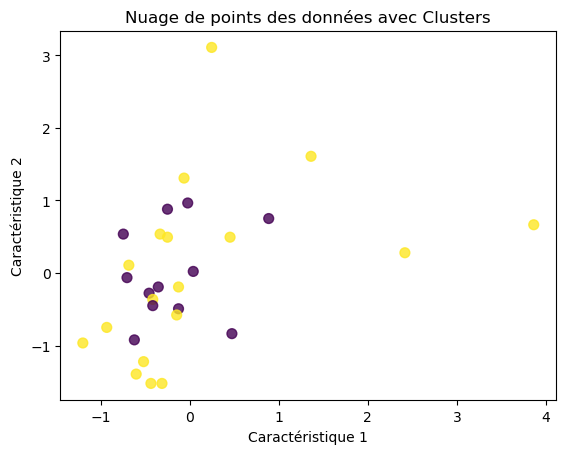

In [13]:
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=cluster_labels, s=50, cmap='viridis', alpha=0.8)
plt.title('Nuage de points des données avec Clusters')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.show()

# ALGORITHME : ARBRE DE DECISION

In [14]:
df=pd.read_csv('gender_classification_v7.csv')
df=df.head(30)
len(df)
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


    Cette dataset semble être liée à des caractéristiques faciales avec l'objectif de prédire le genre (Male ou Female) en utilisant ces caractéristiques.


    **long_hair: Variable binaire indiquant la présence (1) ou l'absence (0) de cheveux longs.
    **forehead_width_cm: Largeur du front en centimètres.
    **forehead_height_cm: Hauteur du front en centimètres.
    **nose_wide: Variable binaire indiquant si le nez est large (1) ou non (0).
    **nose_long: Variable binaire indiquant si le nez est long (1) ou non (0).
    **lips_thin: Variable binaire indiquant si les lèvres sont fines (1) ou non (0).
    **distance_nose_to_lip_long: Variable binaire indiquant si la distance entre le nez et les lèvres est longue (1) ou non (0).
    
    **gender: La variable cible que vous souhaitez prédire, indiquant le genre de la personne (Male ou Female).

      **Ce code construit un modèle d'arbre de décision, l'entraîne sur un ensemble d'entraînement, effectue des prédictions sur un ensemble de test, puis évalue la précision du modèle. La précision est une mesure de la qualité du modèle, représentant le rapport des prédictions correctes sur l'ensemble de test. Plus la précision est élevée, meilleure est la performance du modèle.

In [15]:
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Séparer les caractéristiques (X) et la variable cible (y)
X = df.drop('gender', axis=1)
y = df['gender']

# Diviser l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle d'arbre de décision
tree_classifier = DecisionTreeClassifier()

# Entraîner le modèle sur l'ensemble d'entraînement
tree_classifier.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = tree_classifier.predict(X_test)

# Évaluer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("précision :", accuracy)



précision : 0.6666666666666666


-- une précision de 0.6666666666666666 signifie que le modèle d'arbre de décision que vous avez construit a correctement prédit la classe de genre pour environ 66,67% des échantillons de l'ensemble de test.

-- Le reste (environ 33,33%) représente les échantillons qui ont été mal classés.

# Application de Arbre de Décision 

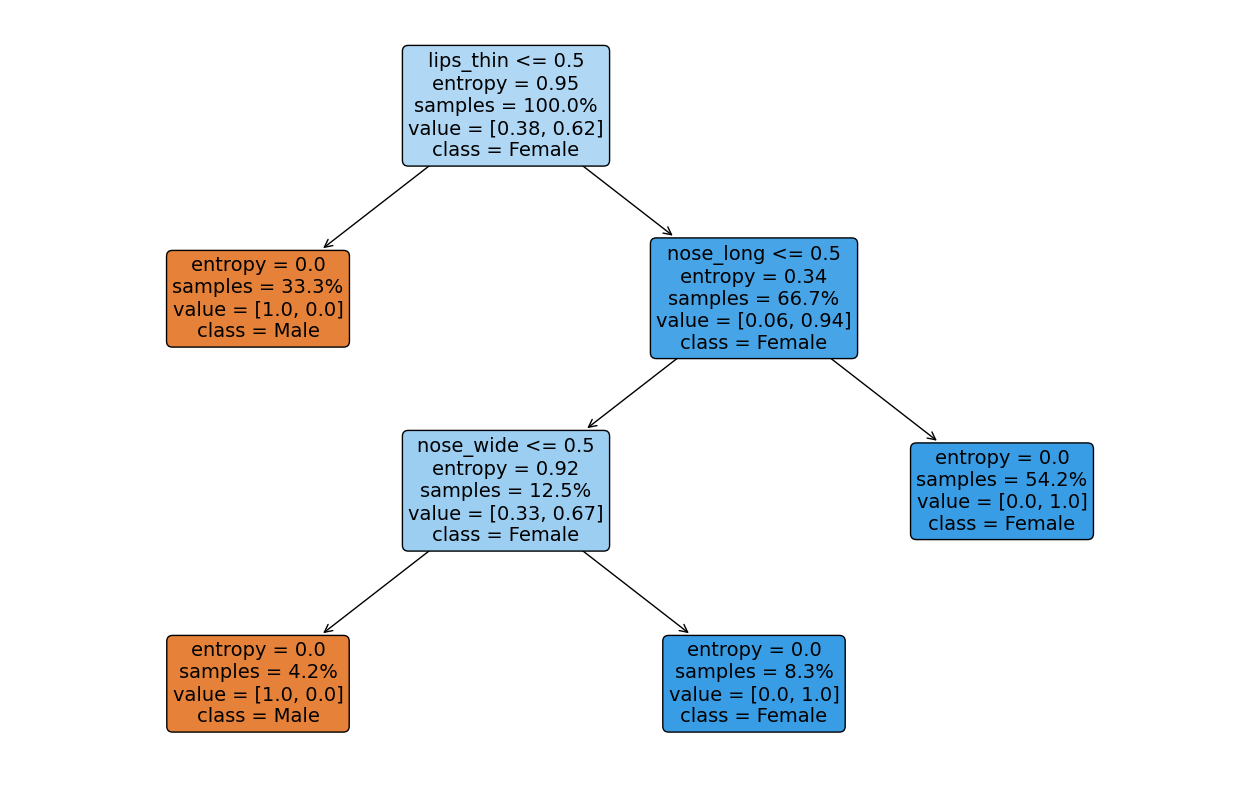

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Séparer les caractéristiques (X) et la variable cible (y)
X = df.drop('gender', axis=1)
y = df['gender']

# Appliquer l'encodage one-hot aux variables catégorielles
X_encoded = pd.get_dummies(X)

# Diviser l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Créer un modèle d'arbre de décision
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Entraîner le modèle
clf.fit(X_train, y_train)

# Afficher l'arbre de décision
plt.figure(figsize=(16, 10))
plot_tree(clf,
          feature_names=X_encoded.columns.tolist(),
          class_names=y.unique().tolist(),
          filled=True,
          impurity=True,
          proportion=True,
          rounded=True,
          precision=2,
          fontsize=14)
plt.show()

# Tester une prédiction.

In [18]:
# Supposons que vous avez de nouvelles données pour lesquelles vous souhaitez faire des prédictions
new_data = pd.DataFrame({
    'long_hair': [1],
    'forehead_width_cm': [12.0],
    'forehead_height_cm': [6.0],
    'nose_wide': [1],
    'nose_long': [0],
    'lips_thin': [1],
    'distance_nose_to_lip_long': [1]
})

# Appliquer l'encodage one-hot aux variables catégorielles
new_data_encoded = pd.get_dummies(new_data)

# Faire des prédictions avec le modèle d'arbre de décision
predictions = clf.predict(new_data_encoded)

# Afficher les prédictions
print("Predictions:", predictions)
 

Predictions: ['Male']


# Atelier de K-NN : construire un modèle 

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [3]:
dataset = pd.read_csv('diabetes.csv')
print(len(dataset))

768


In [4]:
dataset = pd.read_csv('diabetes.csv')
print(len(dataset))
print('--------------------------------------------------------------')
dataset.head()

768
--------------------------------------------------------------


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)

In [6]:
print (dataset['Glucose'])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64


In [7]:
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)


In [8]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
import math

math.sqrt(len(y_test))

12.409673645990857

In [10]:
#Definie the model : Init K-NN 
classifier = KNeighborsClassifier(n_neighbors = 11, p = 2, metric = 'euclidean')
#Fit Model
classifier .fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [11]:
#predict the test set results

y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [12]:
#predict the test set results

y_pred = classifier.predict(X_test)
#Evaluate Model

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[94 13]
 [15 32]]


In [13]:
print(f1_score(y_test, y_pred))

0.6956521739130436


In [14]:
print(accuracy_score(y_test, y_pred))

0.8181818181818182


# Atelier de DBSCAN : l'impact de nombre de voisines

In [13]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
np.random.seed(42)

In [14]:
X, y = make_moons(n_samples=500, noise=0.1)

In [15]:
y_df = pd.DataFrame(y, columns=['feature'])
print(y_df.head())

   feature
0        1
1        0
2        1
3        0
4        0


In [16]:
X_df = pd.DataFrame(X, columns=['feature1', 'feature2'])
print(X_df.head())


   feature1  feature2
0  0.830676 -0.409936
1  0.798355  0.837612
2  1.050468 -0.485162
3 -0.258143  0.980008
4  0.330682  1.147633


In [ ]:
plt.scatter(X[:, 0], X[:, 1], label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Text(0, 0.5, '$x_2$')

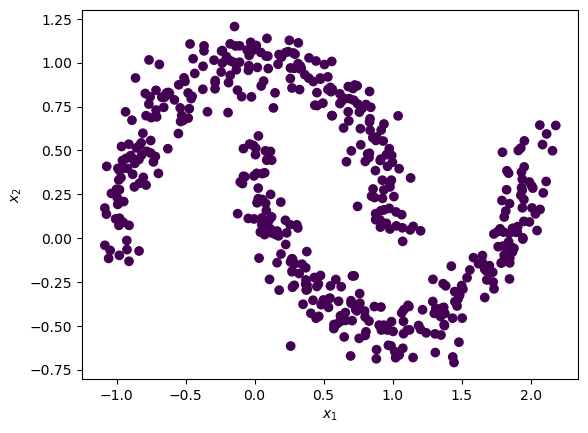

In [23]:
#Using Default parameters
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=dbscan_cluster1.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [ ]:
plt.scatter(X[:, 0], X[:, 1], label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

- eps=0.2:définit la distance maximale entre deux échantillons pour qu'ils soient considérés dans le même voisinage.

- min_samples=20: définit le nombre minimum d'échantillons dans un voisinage pour qu'un point soit considéré comme un "point central".

# Interprétation : 
- avec eps = 0.2 et min_sample = 5 l'algorithme DBSCAN a identifié deux clusters distincts dans les données Avec un point  bruit.
- Les données ont été regroupées en deux ensembles distincts en fonction de la densité des points. Les points au sein de chaque cluster sont considérés comme suffisamment proches les uns des autres, tandis que les zones moins denses sont traitées comme des séparateurs entre les clusters.

Text(0, 0.5, '$x_2$')

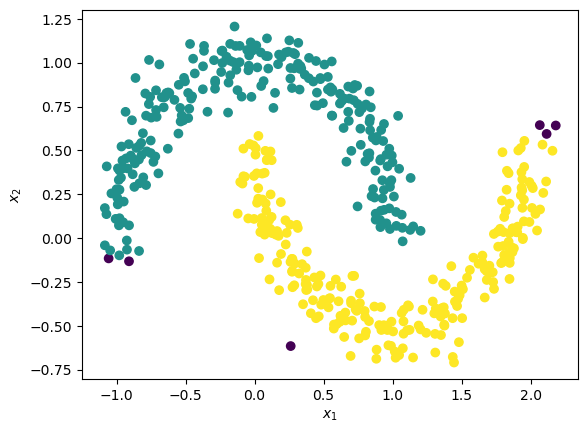

In [41]:
#another parameter
dbscan_cluster3 = DBSCAN(eps=0.2, min_samples=15)
dbscan_cluster3.fit(X)
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=dbscan_cluster3.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Résultat: 
Deux clusters avec un peu des points de bruit.
# Interprétation 

DBSCAN a formé deux clusters distincts dans les données. La densité requise pour former un cluster est relativement basse (min_samples=15), ce qui a permis à DBSCAN de regrouper des zones moins denses. Cependant, quelques points sont considérés comme du bruit, peut-être en raison de zones moins denses entre les clusters.

Text(0, 0.5, '$x_2$')

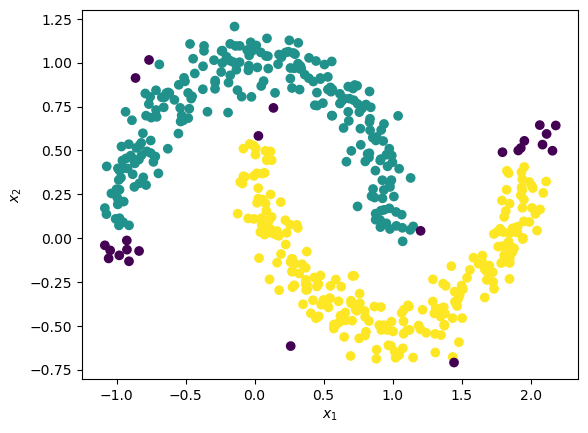

In [42]:
#another parameter
dbscan_cluster4 = DBSCAN(eps=0.2, min_samples=23)
dbscan_cluster4.fit(X)
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=dbscan_cluster4.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Résultat: 
Deux clusters avec une augmantations des points de bruit.

# Interprétation : 
En augmentant le nombre minimum d'échantillons nécessaires pour former un cluster (min_samples=20), DBSCAN devient plus strict quant à la densité requise. Cela a conduit à un regroupement plus fort des points au sein des deux clusters, mais a également augmenté le nombre de points considérés comme du bruit. Les zones moins denses entre les clusters sont moins susceptibles d'être incluses, mais cela peut augmenter la sensibilité au bruit.

Text(0, 0.5, '$x_2$')

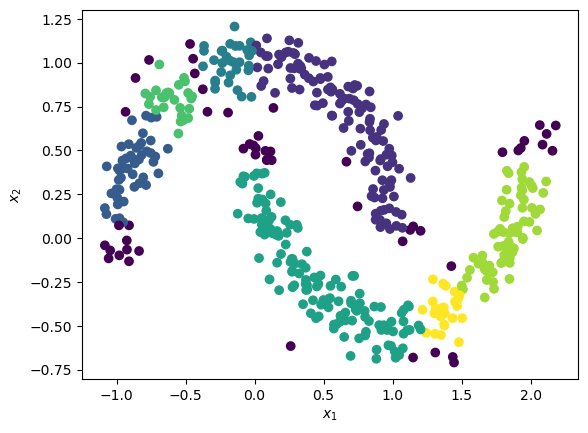

In [45]:
#another parameter
dbscan_cluster4 = DBSCAN(eps=0.2, min_samples=27)
dbscan_cluster4.fit(X)
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=dbscan_cluster4.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Résultat: 
Plusieurs clusters ont été identifiés, et plusieurs points ont été considérés comme du bruit.
# Interprétation: 
En augmentant considérablement min_samples, DBSCAN nécessite une densité encore plus élevée pour former un cluster. Cela a conduit à une division plus fine des données en plusieurs clusters distincts, car des zones moins denses entre les groupes peuvent maintenant être interprétées comme des séparateurs. Cependant, cette stricte exigence de densité a également augmenté le nombre de points considérés comme du bruit, car même des zones relativement denses peuvent ne pas atteindre le seuil requis pour former un cluster

# Conclusion :
L'ajustement de min_samples a un impact direct sur la sensibilité de DBSCAN à la densité des clusters. Un nombre plus élevé peut conduire à une segmentation plus fine des clusters mais aussi à une augmentation du bruit. Il est essentiel de trouver un équilibre en ajustant ce paramètre en fonction de la nature des données et des objectifs d'analyse spécifiques.

# Remarque : 
Pour conclure, l'intérêt de l'utilisation de DBSCAN dépend du contexte spécifique de votre ensemble de données et des objectifs de votre analyse. Avant de choisir DBSCAN ou tout autre algorithme de clustering, il est recommandé de comprendre les propriétés de vos données, d'expérimenter avec différents paramètres, et éventuellement de comparer les résultats avec d'autres méthodes de clustering. L'évaluation de la performance de l'algorithme peut également être importante pour garantir que les clusters identifiés sont pertinents par rapport à la nature des données.
